Run PCR-GLOBWB on https://github.com/UU-Hydro/PCR-GLOBWB_input_example/tree/master/RhineMeuse30min using 
1. Parametersetdb
2. grpc4bmi

In [1]:
from ewatercycle.parametersetdb import Parametersetdb, models

In [2]:
parameter_set = Parametersetdb().select(model='PCR-GLOBWB', name='RhineMeuse30min')

In [3]:
# Write data files required by model to './input'
parameter_set.save_datafiles('./input')

In [3]:
# Overwrite items in config file
# parameter_set.config for this model is a configparser.ConfigParser object
# inputDir and outputDir must be inside /data because grpc4bmi will mount input_dir output_dir as such inside container
parameter_set.config['globalOptions']['inputDir'] = '/data/input'
parameter_set.config['globalOptions']['outputDir'] = '/data/output'
parameter_set.save_config('pcrg_rhinemeuse_ps.ini')

In [4]:
from grpc4bmi.bmi_client_docker import BmiClientDocker

In [5]:
pcrg = BmiClientDocker(image=models['PCR-GLOBWB']['docker'], image_port=55555, 
                        input_dir="./input", 
                        output_dir="./output")

In [6]:
pcrg.initialize("pcrg_rhinemeuse_ps.ini")

In [7]:
tstart = pcrg.get_start_time()
tstep = pcrg.get_time_step()
print(tstart)

36525.0


In [8]:
%time pcrg.update_until(tstart + 100 * tstep)
print(pcrg.get_current_time())

CPU times: user 5.44 ms, sys: 458 µs, total: 5.9 ms
Wall time: 25.7 s
36625.0


In [9]:
variable = "top_layer_soil_saturation"
vals = pcrg.get_value(variable)
unit = pcrg.get_var_units(variable)

[]

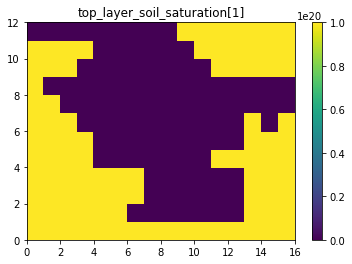

In [11]:
import matplotlib.pyplot as plt
import numpy
import numpy.ma as ma
missval = -999.
X, Y = numpy.arange(vals.shape[1]), numpy.arange(vals.shape[0])
Z = ma.masked_where(vals == missval, vals)
plt.title(variable + '[' + unit + ']')
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.plot()

In [12]:
# Stop the Docker container
del pcrg